# Boston数据集PCA分析

在这个notebook里，我们以Boston房价数据集为例，演示简单的PCA数据分析。


参考资料：
- [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

In [331]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
import numpy as np


数据预处理。

In [332]:
# 读取和预处理数据
table = pd.read_csv('train.csv')
# 只保留数值特征
# 某些字符串特征也可以转换成数值，比如
# Street: Type of road access to property
#        Grvl	Gravel	
#        Pave	Paved
# 可以把Grvl替换成1，Pave替换成0。简单起见，我们这里不进行字符串到数值的操作
numeric_columns = [col for col in train_table.columns if (col not in ('Id', 'MSSubClass')) and (train_table[col].dtype in ('int64', 'float64'))]
X = table[numeric_columns]
# 去除包含NAN的数据点
X = X.dropna()
# 获得价格
y = X['SalePrice']
X = X.drop(['SalePrice'], axis=1)
# 将所有的特征的平均值变成0，方差变成1
# 我们可以对每个特征做不同的处理，使得每个特征的分布都接近正态分布。这里为了简单略过了这个步骤。
scaler = StandardScaler()
normal_X = scaler.fit_transform(X)
# 将数据分为训练集和测试集
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(normal_X, y, test_size=0.1, random_state=42)

In [334]:
table.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


(array([   2.,    0.,   10.,    0.,    0.,   72.,    0.,  277.,    0.,
           0.,  235.,    0.,  233.,    0.,    0.,  127.,    0.,   37.,
           0.,   15.]),
 array([-3.05194306, -2.76213127, -2.47231949, -2.1825077 , -1.89269591,
        -1.60288412, -1.31307233, -1.02326054, -0.73344875, -0.44363696,
        -0.15382517,  0.13598662,  0.42579841,  0.7156102 ,  1.00542199,
         1.29523378,  1.58504557,  1.87485736,  2.16466915,  2.45448094,
         2.74429273]),
 <a list of 20 Patch objects>)

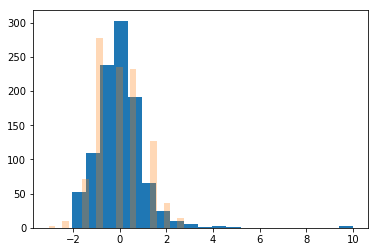

In [330]:
plt.hist(X_train[:,0],bins=20)
plt.hist(X_train[:,2],bins=20,alpha=0.3)


在训练集上进行PCA，选前10个主成分。

In [338]:
# PCA
n_components = 10
pca = TruncatedSVD(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [339]:
components = pca.components_

画图表示每个主成分解释的数据的变化。

前10个主成分解释了数据中63.81%的变化


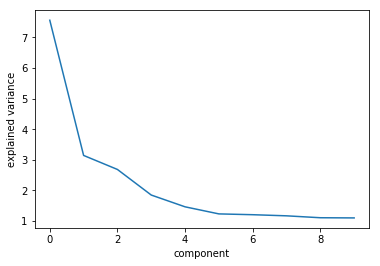

In [340]:
plt.plot(pca.explained_variance_)
plt.xlabel('component')
plt.ylabel('explained variance')
print('前{}个主成分解释了数据中{:.2f}%的变化'.format(n_components, sum(pca.explained_variance_ratio_)*100))

通常，同一个主成分的系数绝对值较大的特征之间可能有较强的相关性（符号相同成正相关，符号相反的成负相关）。下面来实际观察一下第一个主成分的系数。

In [298]:
list(zip(components[0], numeric_columns))

[(0.1697067681744712, 'LotFrontage'),
 (0.12116719795228986, 'LotArea'),
 (0.30086654500828525, 'OverallQual'),
 (-0.10177838778541744, 'OverallCond'),
 (0.23754114733531356, 'YearBuilt'),
 (0.21067276594018072, 'YearRemodAdd'),
 (0.19125461397376922, 'MasVnrArea'),
 (0.14136512897115119, 'BsmtFinSF1'),
 (-0.013552910631127143, 'BsmtFinSF2'),
 (0.11439765110768792, 'BsmtUnfSF'),
 (0.25935427781576248, 'TotalBsmtSF'),
 (0.25917802872961937, '1stFlrSF'),
 (0.11504308229422754, '2ndFlrSF'),
 (0.0042312726505829845, 'LowQualFinSF'),
 (0.28778022835222594, 'GrLivArea'),
 (0.083178776658623943, 'BsmtFullBath'),
 (-0.021142746465711511, 'BsmtHalfBath'),
 (0.25499639047719902, 'FullBath'),
 (0.11080280531027821, 'HalfBath'),
 (0.10177663457086349, 'BedroomAbvGr'),
 (-0.010121364885339589, 'KitchenAbvGr'),
 (0.23572233646658597, 'TotRmsAbvGrd'),
 (0.17611455114376115, 'Fireplaces'),
 (0.23726652438745216, 'GarageYrBlt'),
 (0.28315674291986132, 'GarageCars'),
 (0.27982773073861411, 'GarageArea')

`1stFlrSF`和`GrLivArea`两个系数都比较大，而且都是正数。通过两个变量的散点图检验一下：

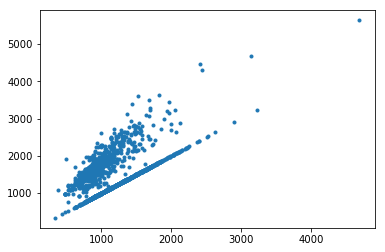

In [341]:
plt.plot(train_table['1stFlrSF'], train_table['GrLivArea'], '.')

看上去确实有正相关性，而且也很容易理解：一层面积越大，生活区的面积通常也越大。再看一下第二个主成分：

In [300]:
list(zip(components[1], numeric_columns))

[(0.03715547954757472, 'LotFrontage'),
 (0.0057805303762654813, 'LotArea'),
 (-0.022651828805917873, 'OverallQual'),
 (0.067970592365521929, 'OverallCond'),
 (-0.22033284737879566, 'YearBuilt'),
 (-0.11768239071513877, 'YearRemodAdd'),
 (-0.023319241978585668, 'MasVnrArea'),
 (-0.26828827784468873, 'BsmtFinSF1'),
 (-0.067786469286949744, 'BsmtFinSF2'),
 (0.10347427021626904, 'BsmtUnfSF'),
 (-0.20143446307834828, 'TotalBsmtSF'),
 (-0.1450185425085658, '1stFlrSF'),
 (0.43960980847935605, '2ndFlrSF'),
 (0.11930673970715386, 'LowQualFinSF'),
 (0.27066982491296904, 'GrLivArea'),
 (-0.27414033030977131, 'BsmtFullBath'),
 (-0.0018492248892872493, 'BsmtHalfBath'),
 (0.12612251149479331, 'FullBath'),
 (0.23355240674182123, 'HalfBath'),
 (0.38646612829669841, 'BedroomAbvGr'),
 (0.1217675810363545, 'KitchenAbvGr'),
 (0.33718133224197711, 'TotRmsAbvGrd'),
 (0.06580246386512946, 'Fireplaces'),
 (-0.18341705147082815, 'GarageYrBlt'),
 (-0.046416258348563173, 'GarageCars'),
 (-0.086145798688830821, '

检验一下`2ndFlrSF`和`TotRmsAbvGrd`的正相关性。

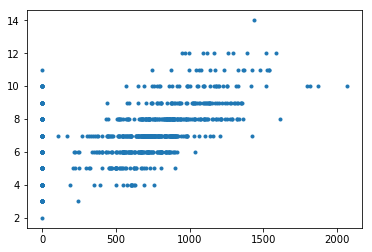

In [301]:
plt.plot(train_table['2ndFlrSF'], train_table['TotRmsAbvGrd'], '.')

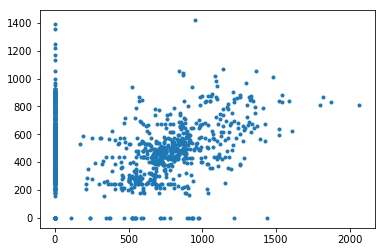

In [216]:
plt.plot(train_table['2ndFlrSF'], train_table['GarageArea'], '.')

也有一定的正相关性：二层面积越大，房间数通常越多。

注意图像左边有一竖列的点，表示有一些房子是没有二层的（二层面积为$0$）。这提示我们二层面积等于$0$和大于$0$的两种情况可能有不同的规律。我们可以为两种情况分别建模。不过实际情况经常是有很多需要分类的特征，比如：

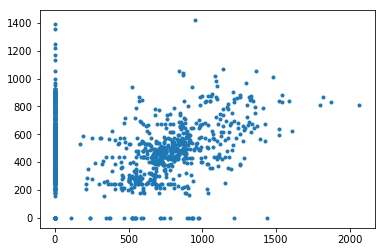

In [302]:
plt.plot(train_table['2ndFlrSF'], train_table['GarageArea'], '.')

不单二层面积可能是$0$，车库面积也有可能是$0$。因此手动给这样不同类型的数据点分别建模通常是不现实的。而我们之后学习的树模型（如决策树）则非常适合这种数据。

PCA可以在提取数据的关键信息的同时降低维度，并且减少数值小的不准确性引起的噪声，在预测价格的回归模型里可以用来预处理数据。下面就用PCA处理过的数据建立简单的线性模型来预测房屋价格。

In [342]:
model = LinearRegression()
model.fit(X_train_pca, y_train)
print('前{}个PCA主成分进行线性回归的MSE是{}'.format(
    n_components,
    sklearn.metrics.mean_squared_error(y_test, model.predict(X_test_pca))))

前10个PCA主成分进行线性回归的MSE是1839068279.229298


In [343]:
model = LinearRegression()
model.fit(X_train, y_train)
# sklearn.metrics.mean_squared_error(y_test, model.predict(X_test))
print('不进行PCA的线性回归的MSE是{}'.format(
    sklearn.metrics.mean_squared_error(y_test, model.predict(X_test))))

不进行PCA的线性回归的MSE是1639942883.8291323


经过PCA处理的数据用于线性回归，尽管效果略差，数据量已经大大减少（以维数来比较，数据量是原来的三分之一以下）。PCA在数据点不足（维数比数据点多）的情况下对建模有重要的意义。

In [312]:
from sklearn import linear_model
for i in range (10):
    a=-10+i
    alpha=10**a
    model = linear_model.Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    print('前{}个PCA主成分进行线性回归的MSE是{}'.format(
        n_components,
        sklearn.metrics.mean_squared_error(y_test, model.predict(X_test))))

前10个PCA主成分进行线性回归的MSE是1642818822.3530037
前10个PCA主成分进行线性回归的MSE是1642818822.3529549
前10个PCA主成分进行线性回归的MSE是1642818822.3524895
前10个PCA主成分进行线性回归的MSE是1642818822.3471863
前10个PCA主成分进行线性回归的MSE是1642818822.3005185
前10个PCA主成分进行线性回归的MSE是1642818821.7415216
前10个PCA主成分进行线性回归的MSE是1642818817.1179564
前10个PCA主成分进行线性回归的MSE是1642818756.7038784
前10个PCA主成分进行线性回归的MSE是1642818283.0732892
前10个PCA主成分进行线性回归的MSE是1642813588.5752766
